In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
from evaluation import evaluate_heursitic_grid
from environment import RoadEnvironment
from environment_presets import small_environment_dict
from policies.heuristics import TCBMHeuristicAgent

In [4]:
parameter_dict = {
    "threshold": np.arange(0,1.05,0.05),
    "inspection_interval": np.arange(1, 51),
}

environment = RoadEnvironment(**small_environment_dict)


number_of_episodes = 5000
results = evaluate_heursitic_grid(
    environment = environment,
    heuristic_class = TCBMHeuristicAgent,
    parameter_dict = parameter_dict,
    number_of_episodes = number_of_episodes,
    number_of_processes = 32,
    result_path = f"results/TCBM_heuristic_grid_search_{number_of_episodes}.csv",
    overwrite = False,
)

results

threshold: 1.0 inspection_interval: 30 - Avg: -7532.91, Std: 8.22: 100%|██████████| 210/210 [05:27<00:00,  1.56s/it]                 


,threshold,inspection_interval,reward_mean,reward_std,episodes
0,0.0,21.0,-1577.532,302.171231,1000.0
1,0.0,22.0,-1577.549,302.183814,1000.0
2,0.0,23.0,-1577.550,302.166970,1000.0
3,0.0,24.0,-1577.527,302.167135,1000.0
4,0.0,25.0,-1549.773,302.262422,1000.0
...,...,...,...,...,...
205,1.0,26.0,-7532.910,8.220821,1000.0
206,1.0,27.0,-7532.910,8.220821,1000.0
207,1.0,28.0,-7532.910,8.220821,1000.0
208,1.0,29.0,-7532.910,8.220821,1000.0


In [8]:
import pandas as pd 
# load results
results = pd.read_csv(f"results/TCBM_heuristic_grid_search.csv")

# find best parameters
best = results.sort_values("reward_mean", ascending=False).head(1)
best_reward_mean = best["reward_mean"].values[0]
best_reward_std = best["reward_std"].values[0]
best_reward_std_error = best["reward_std"].values[0] / np.sqrt(best["episodes"].values[0])

print("Best parameters:")
print(best)
print("\t with std error: {:.2f}".format(best_reward_std_error))

std_error_reward_range = best_reward_mean - best_reward_std_error

best_results = results[results["reward_mean"] >= std_error_reward_range].sort_values("reward_mean", ascending=False)
best_results

Best parameters:
     threshold  inspection_interval  reward_mean  reward_std  episodes
158       0.35                 19.0    -1094.701  228.859082    1000.0
	 with std error: 7.24


,threshold,inspection_interval,reward_mean,reward_std,episodes
158,0.35,19.0,-1094.701,228.859082,1000.0
67,0.15,8.0,-1095.885,230.851883,1000.0
69,0.15,10.0,-1096.289,237.810831,1000.0
137,0.30,18.0,-1100.462,240.904646,1000.0


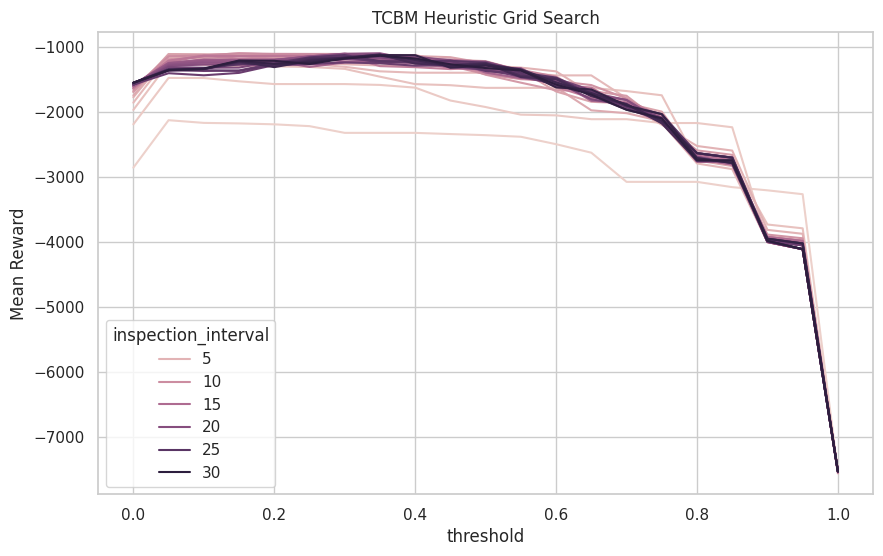

In [13]:
# load results
results = pd.read_csv(f"results/TCBM_heuristic_grid_search.csv")

# plot results
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=results, x="threshold", y="reward_mean", hue="inspection_interval", ax=ax
)
ax.set_title("TCBM Heuristic Grid Search")
ax.set_ylabel("Mean Reward")

plt.savefig("results/TCBM_heuristic_grid_search.png", dpi=300)
plt.show()


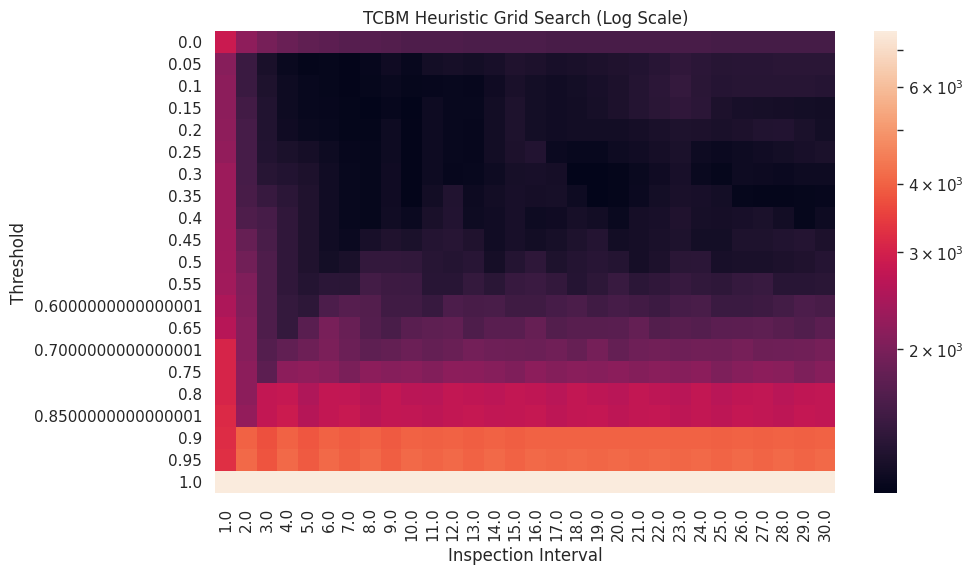

In [23]:
# plot as 2d heatmap

import seaborn as sns
from matplotlib.colors import LogNorm

results = pd.read_csv(f"results/TCBM_heuristic_grid_search.csv")

results = results.pivot(index="threshold", columns="inspection_interval", values="reward_mean")

# make reward_mean positive
results = -results

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(results, ax=ax, norm=LogNorm())
ax.set_title("TCBM Heuristic Grid Search (Log Scale)")
ax.set_ylabel("Threshold")
ax.set_xlabel("Inspection Interval")

plt.savefig("results/TCBM_heuristic_grid_search_heatmap.png", dpi=300)
plt.show()